In [68]:
#calling the pandas library for reading dataset
import pandas as pd
#reading the dataset
data=pd.read_csv('/content/Obesity.csv')

For predicting the weight category i am choosing classification  models

In [69]:
#dataset-obesity
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [70]:
data.columns #column names

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [71]:
data.info() #data description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [72]:
data.mean() #mean value of columns

<ipython-input-72-df08b0b3f3aa>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean() #mean value of columns


Age       24.488346
Height     1.701995
Weight    86.586058
FCVC       2.419043
NCP        2.685628
CH2O       2.008011
FAF        1.010298
TUE        0.657866
dtype: float64

In [73]:
data.isna().sum() #checking missing values

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

In [74]:
#replacing categorical missing value by mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [75]:
data['family_history_with_overweight'].fillna(data['family_history_with_overweight'].mode()[0], inplace=True)

In [76]:
data['CAEC'].fillna(data['CAEC'].mode()[0], inplace=True)

In [77]:
data['SCC'].fillna(data['SCC'].mode()[0], inplace=True)

In [78]:
data['MTRANS'].fillna(data['MTRANS'].mode()[0], inplace=True)

In [79]:
#replacing with mean
data['Height'].fillna(data['Height'].mean(), inplace=True)

In [80]:
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [81]:
#library for visualisations
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
data['Gender'].value_counts()

Male      1070
Female    1041
Name: Gender, dtype: int64

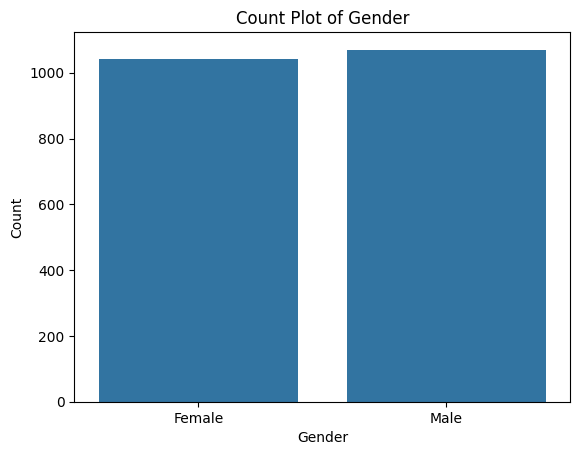

In [83]:
sns.countplot(x='Gender', data=data)#count plot of gender
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count Plot of Gender')
plt.show()

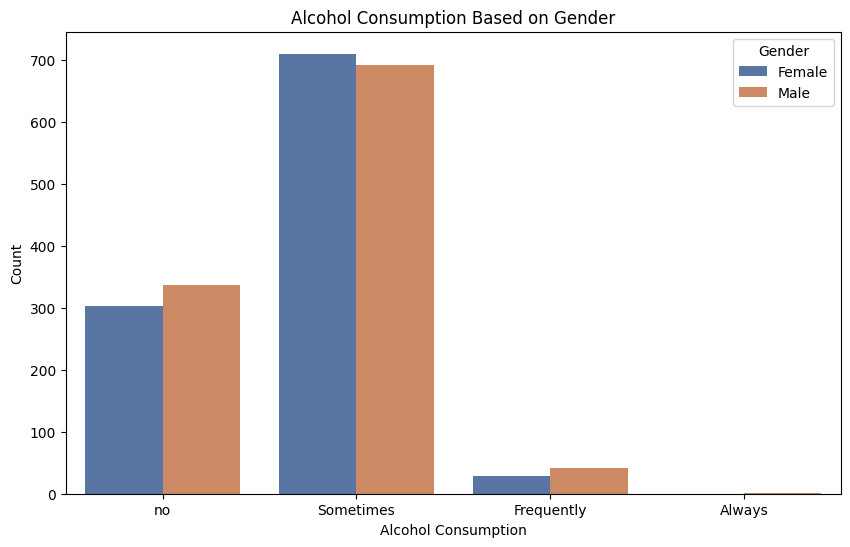

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CALC', hue='Gender', data=data, palette='deep')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.title('Alcohol Consumption Based on Gender')
plt.show()

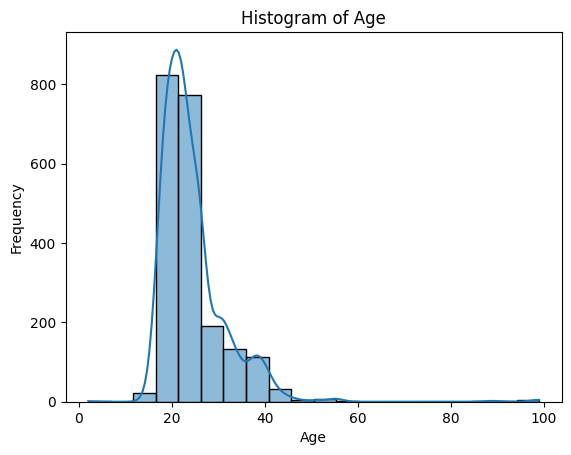

In [85]:
sns.histplot(data['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [86]:
data.corr() #corelation metrics

<ipython-input-86-83390f818ed6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() #corelation metrics


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.039338,0.155285,0.024224,-0.053689,-0.031157,-0.131068,-0.263556
Height,-0.039338,1.000000,0.459837,-0.038149,0.244613,0.213295,0.296582,0.051268
Weight,0.155285,0.459837,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.024224,-0.038149,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.053689,0.244613,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.031157,0.213295,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.131068,0.296582,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.263556,0.051268,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


<ipython-input-87-51831c80aba6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


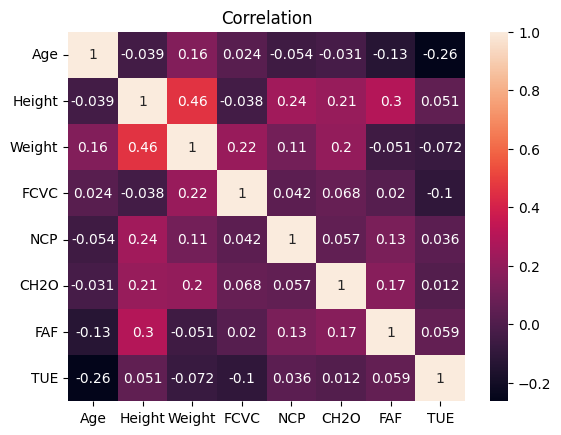

In [87]:
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation')
plt.show()

Text(0.5, 1.0, 'Boxplot of weight')

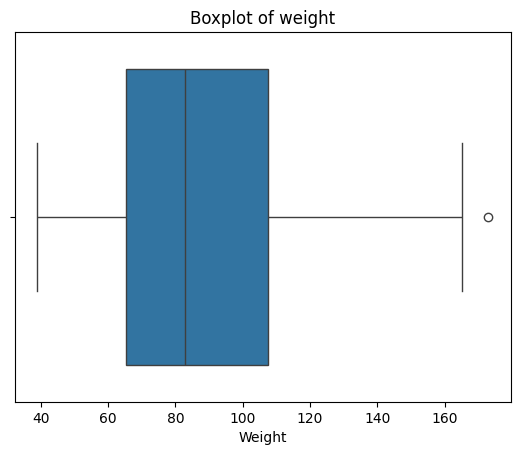

In [88]:
sns.boxplot(x='Weight',data=data) #checking outliers
plt.title('Boxplot of weight')

Text(0.5, 1.0, 'Boxplot of FCVC')

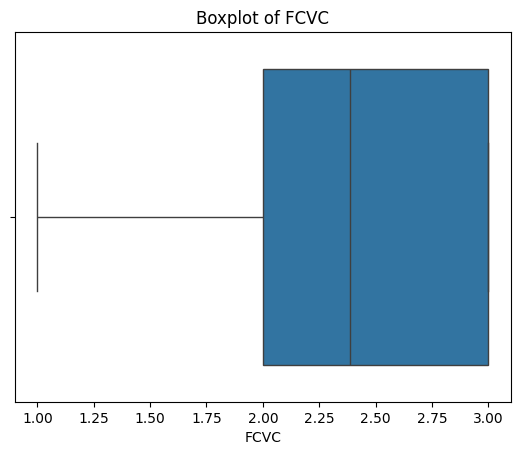

In [89]:
sns.boxplot(x='FCVC',data=data) #checking outliers
plt.title('Boxplot of FCVC')

In [90]:
data = data.drop('family_history_with_overweight', axis=1)

In [91]:
data.head()

,Gender,Age,Height,Weight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [94]:
from sklearn.preprocessing import LabelEncoder #encoding categorical into numerical

In [103]:
label_encoder = LabelEncoder() #encoding
data['Gender']=label_encoder.fit_transform(data['Gender'])

In [104]:
data['FAVC']=label_encoder.fit_transform(data['FAVC'])

In [105]:
data['CAEC']=label_encoder.fit_transform(data['CAEC'])
data['SMOKE']=label_encoder.fit_transform(data['SMOKE'])
data['SCC']=label_encoder.fit_transform(data['SCC'])
data['CALC']=label_encoder.fit_transform(data['CALC'])

In [106]:
data['MTRANS']=label_encoder.fit_transform(data['MTRANS'])

In [117]:
data['NObeyesdad']=label_encoder.fit_transform(data['NObeyesdad'])

In [118]:
data.head()

,Gender,Age,Height,Weight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


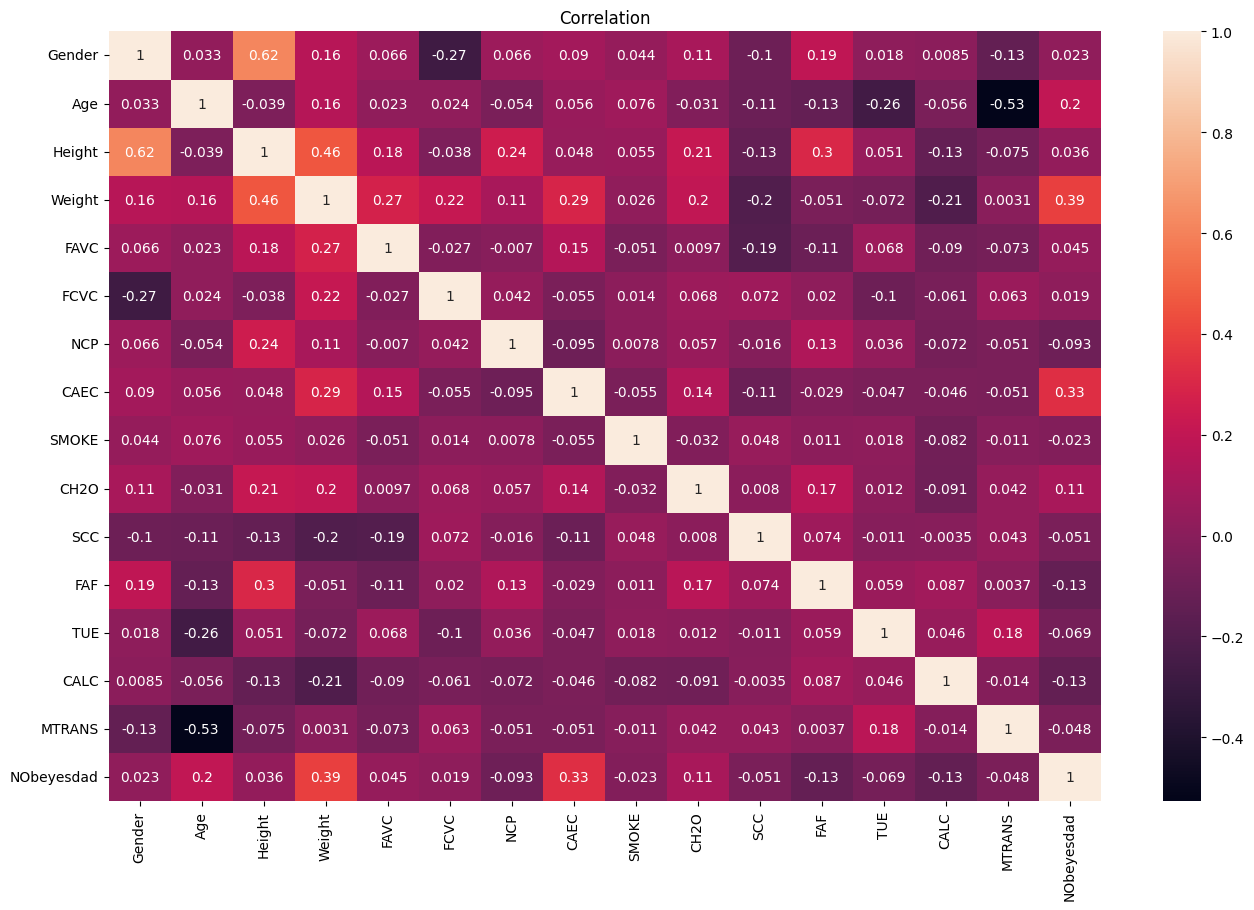

In [119]:
 #heatmap corelation
plt.figure(figsize=(16,10))  # Set the figure size (width, height)
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation')
plt.show()

In [109]:
from sklearn.preprocessing import StandardScaler #scaling
sc = StandardScaler()

In [113]:
#splitting into target and feature variable
X = data.drop(['NObeyesdad','SMOKE','Height'], axis=1)
y = data['NObeyesdad']

In [121]:
x= sc.fit_transform(X)

In [123]:
x

array([[-1.01383324, -0.47372751, -0.86255819, ...,  0.56199675,
         1.4191716 ,  0.50240705],
       [-1.01383324, -0.47372751, -1.16807699, ..., -1.08062463,
        -0.52115952,  0.50240705],
       [ 0.98635551, -0.20212171, -0.36609013, ...,  0.56199675,
        -2.46149063,  0.50240705],
       ...,
       [-1.01383324, -0.266759  ,  1.79886776, ..., -0.01901815,
        -0.52115952,  0.50240705],
       [-1.01383324, -0.01716684,  1.78577968, ..., -0.11799101,
        -0.52115952,  0.50240705],
       [-1.01383324, -0.11185229,  1.7905916 , ...,  0.09243207,
        -0.52115952,  0.50240705]])

In [124]:
from sklearn.model_selection import train_test_split #splitting to train and test

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [126]:
#creating models
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report #for evaluation

In [128]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [130]:
y_pred = rf.predict(x_test)

In [134]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy",accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy 0.9243498817966903
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        56
      Normal_Weight       0.83      0.85      0.84        62
     Obesity_Type_I       0.94      0.94      0.94        78
    Obesity_Type_II       0.95      0.97      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.88      0.89      0.88        56
Overweight_Level_II       0.91      0.84      0.87        50

           accuracy                           0.92       423
          macro avg       0.92      0.92      0.92       423
       weighted avg       0.92      0.92      0.92       423



Random Forest Accuracy =92

In [136]:
#Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [139]:
knn_pred = knn.predict(x_test)

In [149]:
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy",accuracy)
print("Classification Report:\n", classification_report(y_test, knn_pred))

Accuracy 0.7730496453900709
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.66      0.88      0.75        56
      Normal_Weight       0.59      0.32      0.42        62
     Obesity_Type_I       0.81      0.87      0.84        78
    Obesity_Type_II       0.88      0.97      0.92        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       0.73      0.66      0.69        56
Overweight_Level_II       0.65      0.68      0.67        50

           accuracy                           0.77       423
          macro avg       0.76      0.77      0.75       423
       weighted avg       0.76      0.77      0.76       423



KNN accuracy = 77

In [143]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
Dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [145]:
dt_pred = Dt.predict(x_test)

In [150]:
accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy",accuracy)
print("Classification Report:\n", classification_report(y_test, dt_pred))

Accuracy 0.6382978723404256
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.79      0.75      0.77        56
      Normal_Weight       0.54      0.31      0.39        62
     Obesity_Type_I       0.60      0.32      0.42        78
    Obesity_Type_II       0.88      0.76      0.81        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.49      0.64      0.55        56
Overweight_Level_II       0.39      0.82      0.53        50

           accuracy                           0.64       423
          macro avg       0.67      0.66      0.64       423
       weighted avg       0.67      0.64      0.63       423



Decision Tree accuracy= 63

In [147]:
#svm
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)


In [151]:
svc_accuracy = accuracy_score(y_test, svc_pred)
print("SVM Accuracy:", svc_accuracy)
print("Classification Report:\n", classification_report(y_test, svc_pred))

SVM Accuracy: 0.8652482269503546
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.85      0.93      0.89        56
      Normal_Weight       0.73      0.73      0.73        62
     Obesity_Type_I       0.91      0.92      0.92        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.78      0.70      0.74        56
Overweight_Level_II       0.78      0.76      0.77        50

           accuracy                           0.87       423
          macro avg       0.86      0.86      0.86       423
       weighted avg       0.86      0.87      0.86       423



Svc accuracy= 86

In [152]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [153]:
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [155]:
log_pred = log_reg.predict(x_test)

In [156]:
log_accuracy = accuracy_score(y_test, log_pred)
print("Logistic Regression Accuracy:", log_accuracy)

Logistic Regression Accuracy: 0.8014184397163121


In [157]:
print("Classification Report:\n", classification_report(y_test,log_pred ))

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.80      0.98      0.88        56
      Normal_Weight       0.84      0.52      0.64        62
     Obesity_Type_I       0.89      0.81      0.85        78
    Obesity_Type_II       0.85      1.00      0.92        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.63      0.73      0.68        56
Overweight_Level_II       0.55      0.54      0.55        50

           accuracy                           0.80       423
          macro avg       0.79      0.80      0.79       423
       weighted avg       0.81      0.80      0.80       423



Logistic Regression accuracy =80

From the models created Random Forest has highest accuracy of 92 so the model i choose for predicing the weight category of individuals based on
their demographic information, eating habits, and physical condition is Random Forest.